In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [4]:
df=pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## missing values

LotFrontage: has missing value0.1774%
Alley: has missing value0.9377%
MasVnrType: has missing value0.0055%
MasVnrArea: has missing value0.0055%
BsmtQual: has missing value0.0253%
BsmtCond: has missing value0.0253%
BsmtExposure: has missing value0.026%
BsmtFinType1: has missing value0.0253%
BsmtFinType2: has missing value0.026%
FireplaceQu: has missing value0.4726%
GarageType: has missing value0.0555%
GarageYrBlt: has missing value0.0555%
GarageFinish: has missing value0.0555%
GarageQual: has missing value0.0555%
GarageCond: has missing value0.0555%
PoolQC: has missing value0.9952%
Fence: has missing value0.8075%
MiscFeature: has missing value0.963%


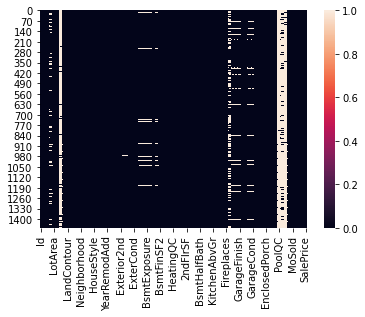

In [14]:
# plt.figure(10,9)
sns.heatmap(df.isna())
feature_has_na=[feature for feature in df.columns if df[feature].isnull().sum()>1]

#to get how many percentage each feature has
for feature in feature_has_na:
    percentage=str(np.round(df[feature].isnull().mean(),4))
    print(str(feature)+ ": has missing value"+ percentage+"%")

In [30]:

for na_feature in feature_has_na:
    data=df.copy()
    data[feature]=np.where(data[feature].isnull(),1,0)